In [110]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Circle
import matplotlib.patches as patches
from ect import ECT, EmbeddedGraph # for figure illustrations we used ect package instead of dect

from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import rdDepictor
import networkx as nx

plt.rcParams.update({
    'font.size': 14,              # tamaño base de fuente
    'axes.titlesize': 16,         # tamaño del título del gráfico
    'axes.labelsize': 14,         # etiquetas de los ejes
    'xtick.labelsize': 12,        # tamaño de los ticks en el eje x
    'ytick.labelsize': 12,        # tamaño de los ticks en el eje y
    'legend.fontsize': 13,        # tamaño de la leyenda
    'figure.titlesize': 16,       # título general (si usas suptitle)
})

#### Euler Characteristic Transform illustration from molecule smile.

In this case, we use as an example the [acetic acid](https://en.wikipedia.org/wiki/Acetic_acid) molecule and its smile, which it is CC(O)=O. You can use as tutorial for the ECT and this plots, the following repository I made: https://github.com/victosdur/EulerCharacteristicTransform_Tutorial/blob/main/ect/tutorial.ipynb

1) Molecule graph, with smile and EC in the title, and directions in the plot.

2) Filtration values for an specific direction

3) ECC for this specific direction and filtration values

4) ECT for the combination of directions



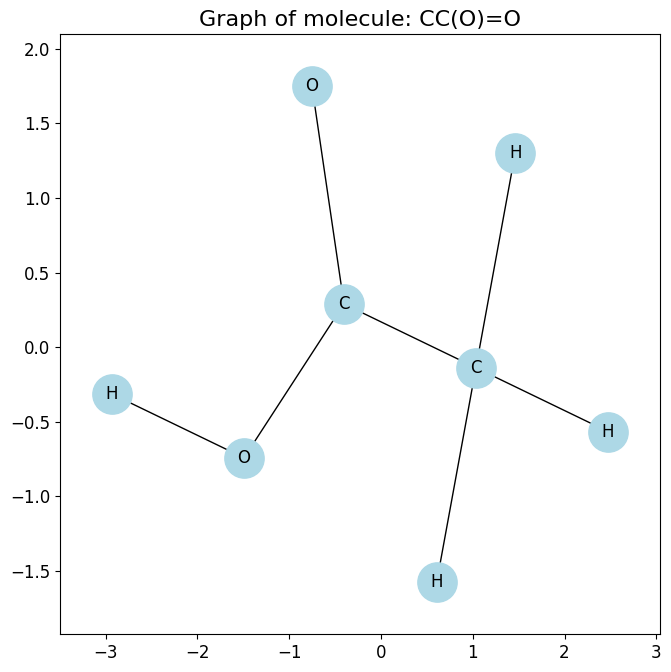

In [ ]:
aceticAcidSmile = "CC(O)=O"

# Convert SMILES to RDKit molecule object
mol = Chem.MolFromSmiles(aceticAcidSmile)
mol = Chem.AddHs(mol)  # Add hydrogens if desired

# Compute 2D coordinates (always the same with same seed, for molecule visualization is super nice)
rdDepictor.Compute2DCoords(mol)

# Access node (atom) information
atom_info = {}
for atom in mol.GetAtoms():
    idx = atom.GetIdx()
    atom_info[idx] = {
        "symbol": atom.GetSymbol(),
        "atomic_num": atom.GetAtomicNum(),
        "is_aromatic": atom.GetIsAromatic(),
    }

# In case you want to see the atom information
# print("Atom info:")
# for idx, info in atom_info.items():
#     print(f"Atom {idx}: {info}")

# Build molecule graph with NetworkX
G = nx.Graph()
for atom in mol.GetAtoms():
    idx = atom.GetIdx()
    G.add_node(idx, **atom_info[idx])

for bond in mol.GetBonds():
    start = bond.GetBeginAtomIdx()
    end = bond.GetEndAtomIdx()
    G.add_edge(start, end, bond_type=str(bond.GetBondType()))

# Get 2D coordinates for layout
conf = mol.GetConformer()
pos = {i: (conf.GetAtomPosition(i).x, conf.GetAtomPosition(i).y) for i in range(mol.GetNumAtoms())}

# Plot the molecular graph
plt.figure(figsize=(6, 6))
nx.draw(G, pos, node_color='lightblue', node_size=800, font_size=10)
nx.draw_networkx_labels(G, pos, labels={atom.GetIdx(): atom.GetSymbol() for atom in mol.GetAtoms()}, font_color='black')
# plt.title(f"Graph of molecule: {aceticAcidSmile}")
plt.axis('on')
plt.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
plt.show()

The radius of bounding circle centered at the origin is 2.7787759390759796


<Figure size 600x600 with 0 Axes>

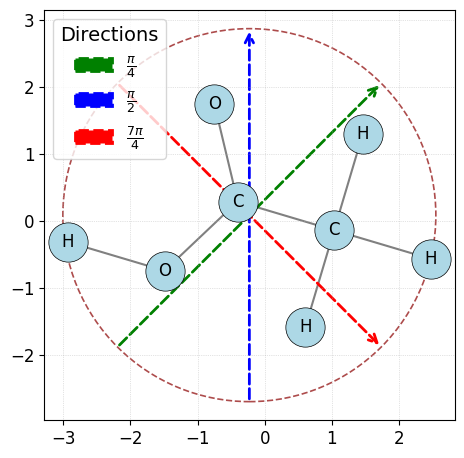

In [116]:
Graphect = EmbeddedGraph()
for nodeKey in pos:
    Graphect.add_node(nodeKey, [pos[nodeKey][0], pos[nodeKey][1]])
for edge in G.edges:
    Graphect.add_edge(edge[0], edge[1])

xcenter, ycenter = Graphect.get_center()
directions = [np.pi/4, np.pi / 2, 7*np.pi / 4]
directionsLatex = [r'$\frac{\pi}{4}$', r'$\frac{\pi}{2}$', r'$\frac{7\pi}{4}$']
color=["green", "blue", "red"]
r = Graphect.get_bounding_radius()
print(f'The radius of bounding circle centered at the origin is {r}')

plt.figure(figsize=(6, 6))
Graphect.plot(with_labels=False,node_size=800,bounding_circle=True)
nx.draw_networkx_labels(G, pos, labels={atom.GetIdx(): atom.GetSymbol() for atom in mol.GetAtoms()}, font_color='black')



for i, theta in enumerate(directions):
    dx = r * np.cos(theta)
    dy = r * np.sin(theta)

    x_start = xcenter - dx
    y_start = ycenter - dy
    x_end = xcenter + dx
    y_end = ycenter + dy

    # plt.plot([x_start, x_end], [y_start, y_end], '--', color=color[i], linewidth=2) # sin flecha
    arrow = patches.FancyArrowPatch(
        (x_start, y_start), (x_end, y_end),
        arrowstyle='->',
        linestyle='--',          # Línea discontinua
        color=color[i],
        linewidth=2,
        mutation_scale=15,
        label=directionsLatex[i],  # Etiqueta de la flecha
    )
    
    plt.gca().add_patch(arrow)
# plt.title(f"Molecule graph with 8 vertices and 7 edges; $\chi=1$")
plt.axis('on')
plt.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
plt.tight_layout()
xlims = plt.xlim()
ylims = plt.ylim()
plt.legend(title="Directions")
plt.savefig('figures/IllustrationPaper/MoleculeGraph.png', dpi=300, bbox_inches='tight')
plt.show()

<Figure size 600x600 with 0 Axes>

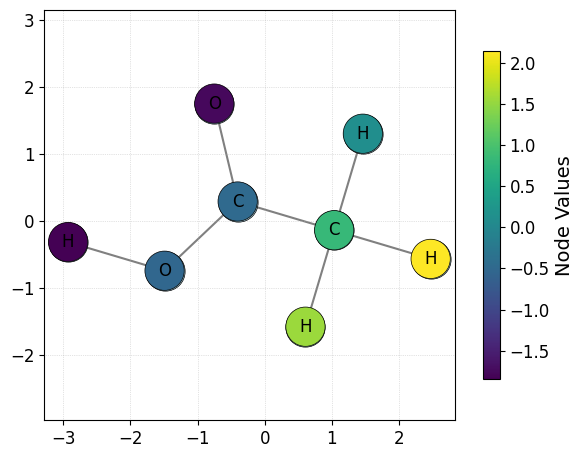

In [117]:
plt.figure(figsize=(6, 6))
Graphect.plot(color_nodes_theta=directions[0],with_labels=False,node_size=800)
nx.draw_networkx_labels(G, pos, labels={atom.GetIdx(): atom.GetSymbol() for atom in mol.GetAtoms()}, font_color='black')
plt.xlim(xlims)
plt.ylim(ylims)
plt.axis('on')
plt.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
# plt.title(f"Filtration values of molecule graph for direction {directionsLatex[0]}")
plt.tight_layout()
plt.savefig('figures/IllustrationPaper/FiltrationExample.png', dpi=300, bbox_inches='tight')
plt.show()

In [96]:
myect = ECT(num_dirs=3, num_thresh=20)
print(f"Number of directions: {myect.num_dirs}")
print(f"Number of thresholds: {myect.num_thresh}")

result = myect.calculate(Graphect)

Number of directions: 3
Number of thresholds: 20


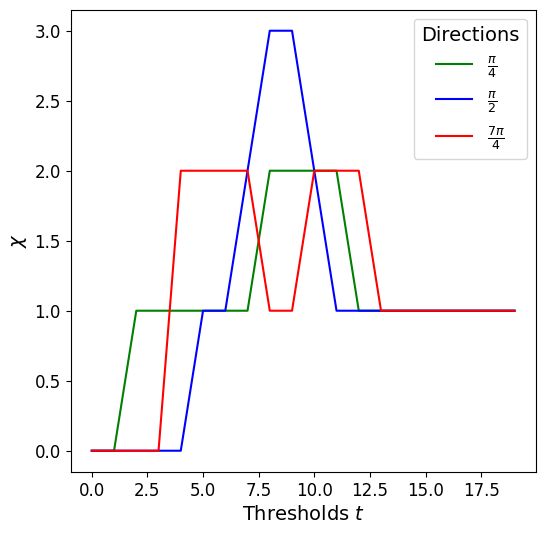

In [118]:
vectors = [myect.calculate(Graphect, theta=theta).squeeze() for theta in directions] # es lo mismo que las siguientes 3 lineas pero ya apiladas
# print(myect.calculate(Graphect, theta=directions[0]))
# print(myect.calculate(Graphect, theta=directions[1]))
# print(myect.calculate(Graphect, theta=directions[2]))
plt.figure(figsize=(6, 6))
for i, ecc in enumerate(vectors):
    plt.plot(ecc, color=color[i], label=directionsLatex[i])
plt.legend(title="Directions")
# plt.title("Euler Characteristic Curves") 
plt.xlabel("Thresholds $t$")
plt.ylabel("$\chi$")
plt.savefig("figures/IllustrationPaper/MoleculeECCs.png", dpi=300, bbox_inches='tight')
plt.show()
matrix = np.stack(vectors, axis=1)

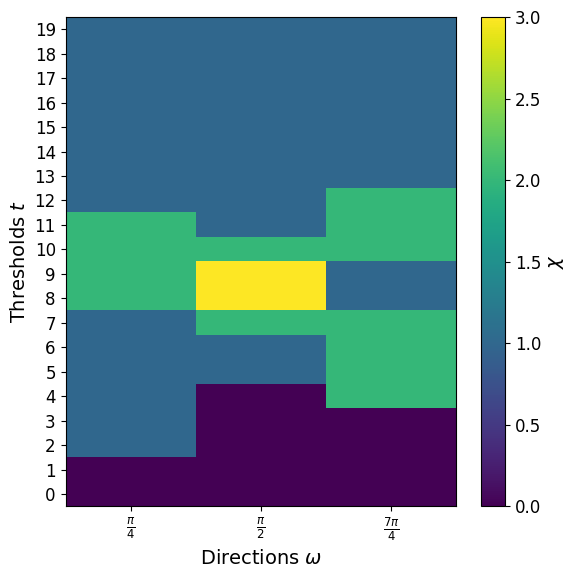

In [119]:
plt.figure(figsize=(6, 6))
plt.imshow(matrix, aspect='auto', cmap='viridis', origin="lower")  # o cualquier colormap
plt.colorbar(label='$\chi$')	

# Etiquetas en columnas: ángulos
plt.xticks(ticks=range(len(directions)), labels=[f"{i}" for i in directionsLatex])
plt.yticks(ticks=range(matrix.shape[0]), labels=[str(i) for i in range(matrix.shape[0])])
plt.xlabel("Directions $\omega$")
plt.ylabel("Thresholds $t$")
# plt.title("Euler Characteristic Transform Matrix")
plt.tight_layout()
plt.savefig("figures/IllustrationPaper/MoleculeECT.png", dpi=300, bbox_inches='tight')
plt.show()


In [51]:
print(myect.directions.thetas)
print(myect.directions.vectors)

[0.        2.0943951 4.1887902]
[[ 1.         0.       ]
 [-0.5        0.8660254]
 [-0.5       -0.8660254]]
